# Data Preparation - Raízen Technical Challenge

### Notebook Intro
This notebook is the 2nd step in the construction of our project for the Raízen Technical Challenge, where we are going to use the insights we got from our Exploratory Data Analysis to process our data.

### Content
Here, we will do all the necessary data treatments to make our data ready for a machine learning model.

### Definitions
Before we start our task, we must make some things clear. For a matter of time, we will generalize our insights from 2010.csv to all other csvs files. It includes:

1. missing values treatment;
2. Data consolidation;
3. Feature engineering.

In a real project, the right thing to be done would be analyze the specifities of each year of each csv. Considering that this challenge is a small simulated scenario of a real project, we will assume that the conclusions we took so far are enough for our next steps. Beyond that, we can use the feature "year" in our machine learning algorithm and let our model learn the yearly patterns.

In [2]:
#setup of our session
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 2010 csv data preparation

In [2]:
#loading 2010 csv
df_2010 = pd.read_csv("../dados_desafio/csvs/2010.csv")
df_2010.head(3)

,time,ca,unit,scp,station,linename,division,desc,entries,exits
0,2010-04-17 04:00:00,A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,REGULAR,2704717.0,928793.0
1,2010-04-17 04:00:00,A002,R051,02-00-01,LEXINGTON AVE,456NQR,BMT,REGULAR,2697632.0,566683.0
2,2010-04-17 04:00:00,A002,R051,02-03-00,LEXINGTON AVE,456NQR,BMT,REGULAR,1127722.0,3943492.0


In [3]:
#dropping nas
df_2010 = df_2010.dropna()

In [4]:
#filtering our dataset
df_2010 = df_2010[df_2010["entries"] >= 0]
df_2010 = df_2010[df_2010["exits"] >= 0]

In [5]:
#first variable: entries

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "entries"

#creating the feature
df_2010["real_entries"] = df_2010.groupby(ids)[variable].diff()

In [6]:
#second variable: exits

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "exits"

#creating the feature
df_2010["real_exits"] = df_2010.groupby(ids)[variable].diff()

In [7]:
#the function diff() generates missing values for the first rows.
#As these first rows are our start point, we will fill the new columns missing values with 0.
df_2010["real_entries"] = df_2010["real_entries"].fillna(0)
df_2010["real_exits"] = df_2010["real_exits"].fillna(0)

In [8]:
#creating our target column
df_2010["people_flow"] = df_2010["real_entries"] + df_2010["real_exits"]
df_2010["people_flow"] = df_2010["people_flow"].round(2)

In [9]:
#dropping what we defined as outliers
df_2010 = df_2010[(df_2010["people_flow"]<50000)&(df_2010["people_flow"]>=0)]

In [10]:
#converting time to datetime
df_2010["time"] = pd.to_datetime(df_2010["time"], format="%Y-%m-%d %H:%M:%S")

#extracting only date
df_2010["date"] = df_2010["time"].dt.date

In [12]:
#consolidating data by date, station and line
#dropping time column - we won't need it anymore
df_2010 = df_2010.drop(columns="time", axis=1)

#consolidating
df_2010 = pd.DataFrame(df_2010.groupby(["date", "station", "linename"]).sum(numeric_only=True))
df_2010 = df_2010.reset_index()
df_2010.head(3)

,date,station,linename,entries,exits,real_entries,real_exits,people_flow
0,2010-04-17,1 AVE,L,265071111.0,224481314.0,8179.0,9088.0,17267.0
1,2010-04-17,103 ST,1,195542531.0,106410762.0,6570.0,2408.0,8978.0
2,2010-04-17,103 ST,6,144693237.0,150159494.0,6740.0,5891.0,12631.0


In [13]:
#checking final shape 
df_2010.shape

(116692, 8)

### Treating the next CSVs
For a matter of convenience to make our process of copy and paste easier, we are going to put all the previous transformations in a cell per csv.

### 2011 csv data preparation

In [15]:
#loading 2011 csv
df_2011 = pd.read_csv("../dados_desafio/csvs/2011.csv")

#dropping nas
df_2011 = df_2011.dropna()

#filtering our dataset
df_2011 = df_2011[df_2011["entries"] >= 0]
df_2011 = df_2011[df_2011["exits"] >= 0]

#first variable: entries

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "entries"

#creating the feature
df_2011["real_entries"] = df_2011.groupby(ids)[variable].diff()

#second variable: exits

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "exits"

#creating the feature
df_2011["real_exits"] = df_2011.groupby(ids)[variable].diff()

#the function diff() generates missing values for the first rows.
#As these first rows are our start point, we will fill the new columns missing values with 0.
df_2011["real_entries"] = df_2011["real_entries"].fillna(0)
df_2011["real_exits"] = df_2011["real_exits"].fillna(0)

#creating our target column
df_2011["people_flow"] = df_2011["real_entries"] + df_2011["real_exits"]
df_2011["people_flow"] = df_2011["people_flow"].round(2)

#dropping what we defined as outliers
df_2011 = df_2011[(df_2011["people_flow"]<50000)&(df_2011["people_flow"]>=0)]

#converting time to datetime
df_2011["time"] = pd.to_datetime(df_2011["time"], format="%Y-%m-%d %H:%M:%S")

#extracting only date
df_2011["date"] = df_2011["time"].dt.date

#consolidating data by date, station and line
#dropping time column - we won't need it anymore
df_2011 = df_2011.drop(columns="time", axis=1)

#consolidating
df_2011 = pd.DataFrame(df_2011.groupby(["date", "station", "linename"]).sum(numeric_only=True))
df_2011 = df_2011.reset_index()
df_2011.head(3)

,date,station,linename,entries,exits,real_entries,real_exits,people_flow
0,2011-01-01,1 AVE,L,232541330.0,199821272.0,14349.0,16457.0,30806.0
1,2011-01-01,103 ST,1,288716535.0,152920510.0,7663.0,3139.0,10802.0
2,2011-01-01,103 ST,6,149153844.0,198109668.0,6312.0,5869.0,12181.0


In [16]:
#checking final shape
df_2011.shape

(172598, 8)

### 2012 csv data processing

In [17]:
#loading 2012 csv
df_2012 = pd.read_csv("../dados_desafio/csvs/2012.csv")

#dropping nas
df_2012 = df_2012.dropna()

#filtering our dataset
df_2012 = df_2012[df_2012["entries"] >= 0]
df_2012 = df_2012[df_2012["exits"] >= 0]

#first variable: entries

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "entries"

#creating the feature
df_2012["real_entries"] = df_2012.groupby(ids)[variable].diff()

#second variable: exits

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "exits"

#creating the feature
df_2012["real_exits"] = df_2012.groupby(ids)[variable].diff()

#the function diff() generates missing values for the first rows.
#As these first rows are our start point, we will fill the new columns missing values with 0.
df_2012["real_entries"] = df_2012["real_entries"].fillna(0)
df_2012["real_exits"] = df_2012["real_exits"].fillna(0)

#creating our target column
df_2012["people_flow"] = df_2012["real_entries"] + df_2012["real_exits"]
df_2012["people_flow"] = df_2012["people_flow"].round(2)

#dropping what we defined as outliers
df_2012 = df_2012[(df_2012["people_flow"]<50000)&(df_2012["people_flow"]>=0)]

#converting time to datetime
df_2012["time"] = pd.to_datetime(df_2012["time"], format="%Y-%m-%d %H:%M:%S")

#extracting only date
df_2012["date"] = df_2012["time"].dt.date

#consolidating data by date, station and line
#dropping time column - we won't need it anymore
df_2012 = df_2012.drop(columns="time", axis=1)

#consolidating
df_2012 = pd.DataFrame(df_2012.groupby(["date", "station", "linename"]).sum(numeric_only=True))
df_2012 = df_2012.reset_index()
df_2012.head(3)

,date,station,linename,entries,exits,real_entries,real_exits,people_flow
0,2012-01-01,1 AVE,L,281498701.0,254021896.0,14761.0,17372.0,32133.0
1,2012-01-01,103 ST,1,305042196.0,156652274.0,7445.0,3271.0,10716.0
2,2012-01-01,103 ST,6,180839175.0,229247447.0,6113.0,5743.0,11856.0


In [18]:
#checking final shape
df_2012.shape

(171884, 8)

### 2013 csv data processing

In [19]:
#loading 2013 csv
df_2013 = pd.read_csv("../dados_desafio/csvs/2013.csv")

#dropping nas
df_2013 = df_2013.dropna()

#filtering our dataset
df_2013 = df_2013[df_2013["entries"] >= 0]
df_2013 = df_2013[df_2013["exits"] >= 0]

#first variable: entries

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "entries"

#creating the feature
df_2013["real_entries"] = df_2013.groupby(ids)[variable].diff()

#second variable: exits

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "exits"

#creating the feature
df_2013["real_exits"] = df_2013.groupby(ids)[variable].diff()

#the function diff() generates missing values for the first rows.
#As these first rows are our start point, we will fill the new columns missing values with 0.
df_2013["real_entries"] = df_2013["real_entries"].fillna(0)
df_2013["real_exits"] = df_2013["real_exits"].fillna(0)

#creating our target column
df_2013["people_flow"] = df_2013["real_entries"] + df_2013["real_exits"]
df_2013["people_flow"] = df_2013["people_flow"].round(2)

#dropping what we defined as outliers
df_2013 = df_2013[(df_2013["people_flow"]<50000)&(df_2013["people_flow"]>=0)]

#converting time to datetime
df_2013["time"] = pd.to_datetime(df_2013["time"], format="%Y-%m-%d %H:%M:%S")

#extracting only date
df_2013["date"] = df_2013["time"].dt.date

#consolidating data by date, station and line
#dropping time column - we won't need it anymore
df_2013 = df_2013.drop(columns="time", axis=1)

#consolidating
df_2013 = pd.DataFrame(df_2013.groupby(["date", "station", "linename"]).sum(numeric_only=True))
df_2013 = df_2013.reset_index()
df_2013.head(3)

,date,station,linename,entries,exits,real_entries,real_exits,people_flow
0,2013-01-01,1 AVE,L,279170137.0,271995465.0,15674.0,17456.0,33130.0
1,2013-01-01,103 ST,1,333864023.0,169558842.0,7660.0,3566.0,11226.0
2,2013-01-01,103 ST,6,167932923.0,215201331.0,6281.0,5690.0,11971.0


In [20]:
#checking final shape
df_2013.shape

(172204, 8)

### 2014 csv data processing

In [21]:
#loading 2014 csv
df_2014 = pd.read_csv("../dados_desafio/csvs/2014.csv")

#dropping nas
df_2014 = df_2014.dropna()

#filtering our dataset
df_2014 = df_2014[df_2014["entries"] >= 0]
df_2014 = df_2014[df_2014["exits"] >= 0]

#first variable: entries

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "entries"

#creating the feature
df_2014["real_entries"] = df_2014.groupby(ids)[variable].diff()

#second variable: exits

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "exits"

#creating the feature
df_2014["real_exits"] = df_2014.groupby(ids)[variable].diff()

#the function diff() generates missing values for the first rows.
#As these first rows are our start point, we will fill the new columns missing values with 0.
df_2014["real_entries"] = df_2014["real_entries"].fillna(0)
df_2014["real_exits"] = df_2014["real_exits"].fillna(0)

#creating our target column
df_2014["people_flow"] = df_2014["real_entries"] + df_2014["real_exits"]
df_2014["people_flow"] = df_2014["people_flow"].round(2)

#dropping what we defined as outliers
df_2014 = df_2014[(df_2014["people_flow"]<50000)&(df_2014["people_flow"]>=0)]

#converting time to datetime
df_2014["time"] = pd.to_datetime(df_2014["time"], format="%Y-%m-%d %H:%M:%S")

#extracting only date
df_2014["date"] = df_2014["time"].dt.date

#consolidating data by date, station and line
#dropping time column - we won't need it anymore
df_2014 = df_2014.drop(columns="time", axis=1)

#consolidating
df_2014 = pd.DataFrame(df_2014.groupby(["date", "station", "linename"]).sum(numeric_only=True))
df_2014 = df_2014.reset_index()
df_2014.head(3)

,date,station,linename,entries,exits,real_entries,real_exits,people_flow
0,2014-01-01,1 AVE,L,215918570.0,297749126.0,14774.0,16478.0,31252.0
1,2014-01-01,103 ST,1,363084184.0,182503356.0,7388.0,3387.0,10775.0
2,2014-01-01,103 ST,6,200519792.0,244892979.0,6080.0,5765.0,11845.0


In [22]:
#checking final shape
df_2014.shape

(169078, 8)

### 2015 csv data loading

In [23]:
#loading 2015 csv
df_2015 = pd.read_csv("../dados_desafio/csvs/2015.csv")

#dropping nas
df_2015 = df_2015.dropna()

#filtering our dataset
df_2015 = df_2015[df_2015["entries"] >= 0]
df_2015 = df_2015[df_2015["exits"] >= 0]

#first variable: entries

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "entries"

#creating the feature
df_2015["real_entries"] = df_2015.groupby(ids)[variable].diff()

#second variable: exits

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "exits"

#creating the feature
df_2015["real_exits"] = df_2015.groupby(ids)[variable].diff()

#the function diff() generates missing values for the first rows.
#As these first rows are our start point, we will fill the new columns missing values with 0.
df_2015["real_entries"] = df_2015["real_entries"].fillna(0)
df_2015["real_exits"] = df_2015["real_exits"].fillna(0)

#creating our target column
df_2015["people_flow"] = df_2015["real_entries"] + df_2015["real_exits"]
df_2015["people_flow"] = df_2015["people_flow"].round(2)

#dropping what we defined as outliers
df_2015 = df_2015[(df_2015["people_flow"]<50000)&(df_2015["people_flow"]>=0)]

#converting time to datetime
df_2015["time"] = pd.to_datetime(df_2015["time"], format="%Y-%m-%d %H:%M:%S")

#extracting only date
df_2015["date"] = df_2015["time"].dt.date

#consolidating data by date, station and line
#dropping time column - we won't need it anymore
df_2015 = df_2015.drop(columns="time", axis=1)

#consolidating
df_2015 = pd.DataFrame(df_2015.groupby(["date", "station", "linename"]).sum(numeric_only=True))
df_2015 = df_2015.reset_index()
df_2015.head(3)

,date,station,linename,entries,exits,real_entries,real_exits,people_flow
0,2015-01-01,1 AVE,L,264795047.0,348842375.0,15768.0,16959.0,32727.0
1,2015-01-01,103 ST,1,356193791.0,184065692.0,7636.0,3250.0,10886.0
2,2015-01-01,103 ST,6,169024197.0,205598423.0,6048.0,4744.0,10792.0


In [24]:
#checking final shape
df_2015.shape

(172617, 8)

### 2016 csv data processing

In [25]:
#loading 2016 csv
df_2016 = pd.read_csv("../dados_desafio/csvs/2016.csv")

#dropping nas
df_2016 = df_2016.dropna()

#filtering our dataset
df_2016 = df_2016[df_2016["entries"] >= 0]
df_2016 = df_2016[df_2016["exits"] >= 0]

#first variable: entries

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "entries"

#creating the feature
df_2016["real_entries"] = df_2016.groupby(ids)[variable].diff()

#second variable: exits

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "exits"

#creating the feature
df_2016["real_exits"] = df_2016.groupby(ids)[variable].diff()

#the function diff() generates missing values for the first rows.
#As these first rows are our start point, we will fill the new columns missing values with 0.
df_2016["real_entries"] = df_2016["real_entries"].fillna(0)
df_2016["real_exits"] = df_2016["real_exits"].fillna(0)

#creating our target column
df_2016["people_flow"] = df_2016["real_entries"] + df_2016["real_exits"]
df_2016["people_flow"] = df_2016["people_flow"].round(2)

#dropping what we defined as outliers
df_2016 = df_2016[(df_2016["people_flow"]<50000)&(df_2016["people_flow"]>=0)]

#converting time to datetime
df_2016["time"] = pd.to_datetime(df_2016["time"], format="%Y-%m-%d %H:%M:%S")

#extracting only date
df_2016["date"] = df_2016["time"].dt.date

#consolidating data by date, station and line
#dropping time column - we won't need it anymore
df_2016 = df_2016.drop(columns="time", axis=1)

#consolidating
df_2016 = pd.DataFrame(df_2016.groupby(["date", "station", "linename"]).sum(numeric_only=True))
df_2016 = df_2016.reset_index()
df_2016.head(3)

,date,station,linename,entries,exits,real_entries,real_exits,people_flow
0,2016-01-01,1 AV,L,8.446645e+09,8.816053e+09,13952.0,14902.0,28854.0
1,2016-01-01,103 ST,1,3.818232e+08,1.959350e+08,7035.0,3194.0,10229.0
2,2016-01-01,103 ST,6,2.155538e+08,2.535317e+08,5904.0,5714.0,11618.0


In [26]:
#checking final shape
df_2016.shape

(172041, 8)

### 2017 csv data processing

In [27]:
#loading 2017 csv
df_2017 = pd.read_csv("../dados_desafio/csvs/2017.csv")

#dropping nas
df_2017 = df_2017.dropna()

#filtering our dataset
df_2017 = df_2017[df_2017["entries"] >= 0]
df_2017 = df_2017[df_2017["exits"] >= 0]

#first variable: entries

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "entries"

#creating the feature
df_2017["real_entries"] = df_2017.groupby(ids)[variable].diff()

#second variable: exits

#defining some variables for our calculation
ids = ["ca", "station", "scp", "linename"]
variable = "exits"

#creating the feature
df_2017["real_exits"] = df_2017.groupby(ids)[variable].diff()

#the function diff() generates missing values for the first rows.
#As these first rows are our start point, we will fill the new columns missing values with 0.
df_2017["real_entries"] = df_2017["real_entries"].fillna(0)
df_2017["real_exits"] = df_2017["real_exits"].fillna(0)

#creating our target column
df_2017["people_flow"] = df_2017["real_entries"] + df_2017["real_exits"]
df_2017["people_flow"] = df_2017["people_flow"].round(2)

#dropping what we defined as outliers
df_2017 = df_2017[(df_2017["people_flow"]<50000)&(df_2017["people_flow"]>=0)]

#converting time to datetime
df_2017["time"] = pd.to_datetime(df_2017["time"], format="%Y-%m-%d %H:%M:%S")

#extracting only date
df_2017["date"] = df_2017["time"].dt.date

#consolidating data by date, station and line
#dropping time column - we won't need it anymore
df_2017 = df_2017.drop(columns="time", axis=1)

#consolidating
df_2017 = pd.DataFrame(df_2017.groupby(["date", "station", "linename"]).sum(numeric_only=True))
df_2017 = df_2017.reset_index()
df_2017.head(3)

,date,station,linename,entries,exits,real_entries,real_exits,people_flow
0,2017-01-01,1 AV,L,8.488928e+09,8.807664e+09,11467.0,12935.0,24402.0
1,2017-01-01,103 ST,1,4.076059e+08,2.081395e+08,6560.0,3196.0,9756.0
2,2017-01-01,103 ST,6,3.950285e+08,3.247158e+09,5503.0,4764.0,10267.0


In [28]:
#checking final shape
df_2017.shape

(126039, 8)

### Concatenating all dataframes in a final dataframe

In [29]:
df_final = pd.concat([df_2010, df_2011])
df_final = pd.concat([df_final, df_2012])
df_final = pd.concat([df_final, df_2013])
df_final = pd.concat([df_final, df_2014])
df_final = pd.concat([df_final, df_2015])
df_final = pd.concat([df_final, df_2016])
df_final = pd.concat([df_final, df_2017])

In [30]:
#checking final shape
df_final.shape

(1273153, 8)

Now we have our dataset ready to start our step of building up our machine learning model.

In [31]:
#saving our prepared dataset
df_final.to_csv("../dados_desafio/prepared_data.csv", index=False)

### Analyzing the annual data

In [3]:
#reading data
data = pd.read_csv("../dados_desafio/prepared_data.csv")
data.head(3)

,date,station,linename,entries,exits,real_entries,real_exits,people_flow
0,2010-04-17,1 AVE,L,265071111.0,224481314.0,8179.0,9088.0,17267.0
1,2010-04-17,103 ST,1,195542531.0,106410762.0,6570.0,2408.0,8978.0
2,2010-04-17,103 ST,6,144693237.0,150159494.0,6740.0,5891.0,12631.0


In [5]:
#creating year feature
data["date"] = pd.to_datetime(data["date"], dayfirst=False)
data["year"] = data["date"].dt.year

Text(0.5, 1.0, 'flow of people over years')

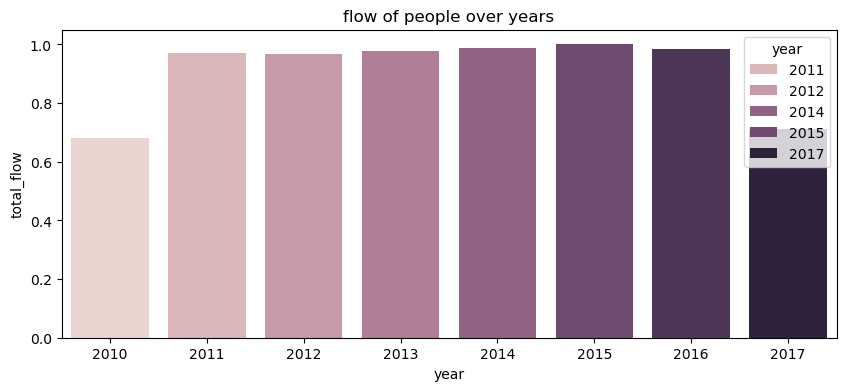

In [7]:
#aggrouping data by year
df_year = pd.DataFrame(data.groupby(["year"])["people_flow"].sum().rename("total_flow"))
df_year = df_year.reset_index()

#normalizing data
max_value = df_year["total_flow"].max()
df_year["total_flow"] = df_year["total_flow"]/max_value

#plotting
plt.figure(figsize=(10, 4))
sns.barplot(x="year", y="total_flow", hue="year", data=df_year)
plt.title("flow of people over years")

It is a very similar amount of people flowing through the metro over the year, except for 2010 and 2017. What we need to know is if we have a whole year data in these two years.

In [8]:
#min date value
data["date"].min()

Timestamp('2010-04-17 00:00:00')

In [9]:
#max_value
data["date"].max()

Timestamp('2017-09-23 00:00:00')

Now we can see that we do not have complete years of data for 2010 and 2017. In a first look, year does not seem a good feature. But what is the impact of the years among the stations?

In [10]:
#aggrouping data by year
df_year = pd.DataFrame(data.groupby(["year", "station"])["people_flow"].sum().rename("total_flow"))
df_year = df_year.reset_index()

#normalizing data
max_value = df_year["total_flow"].max()
df_year["total_flow"] = df_year["total_flow"]/max_value

#sorting values
df_year = df_year.sort_values(by=["year", "total_flow"], ascending=False)

In [11]:
#creating a new dataframe with the top5 stations in every year
years = [2010, 2011, 2012, 2013, 
        2014, 2015, 2016, 2017]

#initializing an empty dataframe
df_plot = pd.DataFrame()

#loop
for y in years:
    #creating an intermed dataframe
    df_intermed = df_year[df_year["year"] == y]
    df_intermed = df_intermed.head(5)
    
    #concatenating the dataframes
    df_plot = pd.concat([df_plot, df_intermed])

In [12]:
#a small check on our new dataframe
df_plot.head()

,year,station,total_flow
67,2010,34 ST-PENN STA,0.672607
72,2010,42 ST-GRD CNTRL,0.565352
66,2010,34 ST-HERALD SQ,0.508624
18,2010,14 ST-UNION SQ,0.462018
113,2010,86 ST,0.425442


Text(0.5, 1.0, 'Top 5 stations in every year')

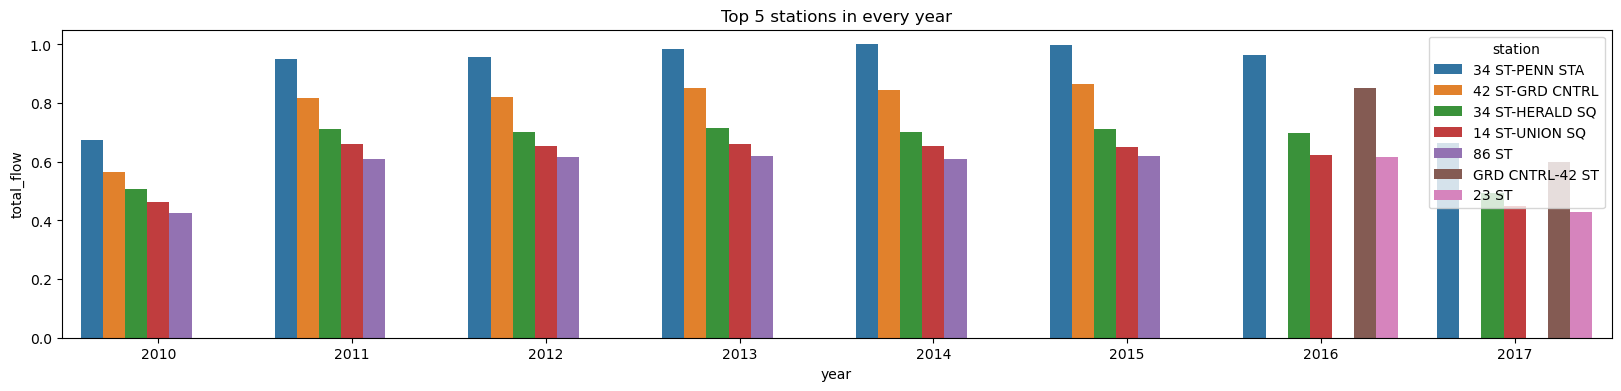

In [13]:
#creating the plot
plt.figure(figsize=(20, 4))
sns.barplot(x="year", y="total_flow", hue="station", data=df_plot)
plt.title("Top 5 stations in every year")

We have almost the same pattern in every year. Definetly we are not going to use year as an input feature for our machine learning model that is going to be built in our next notebook.